IMPORT MODULES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [2]:
H_0 = 75 * 10**3 / (3.086*10**22) # s^-1
m_0 = -20.45
c = 3*10**8 # m/s

Investigate relationship between luminosity distance and redshift

_NOTE: We expect a  roughly linear relationship between distance and redshift, known as Hubble’s Law. However, if we extend the measurement to more distant objects, the relation becomes curved, and strongly dependent on the matter content of the Universe._

Text(0, 0.5, 'Redshift $z$')

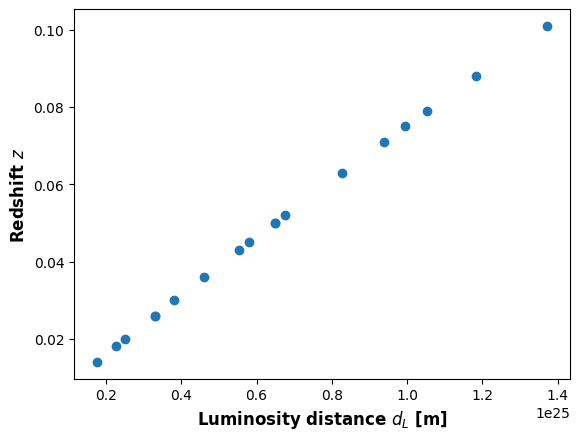

In [3]:
#reads data
name, redshift, eff_peak_mag, mag_err = functions.read_data('sn_data.txt')

#z < 0.1 data
low_redshift_indices = np.where(redshift<0.102)[0]
comoving_distance = functions.get_comoving_distance_low_z(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], H_0)
peak_flux, peak_flux_err = functions.get_flux(eff_peak_mag, mag_err, m_0)
d_L = functions.get_luminosity_distance(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], comoving_distance)
plt.scatter(d_L, redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1])
plt.xlabel('Luminosity distance $d_L$ [m]', weight = 'bold', fontsize = 12)
plt.ylabel('Redshift $z$', weight = 'bold', fontsize = 12)

Plotting effective magnitude against luminosity distance and fitting a curve to obtain the peak luminosity.

Text(0, 0.5, 'Effective magnitude $m_{eff}$')

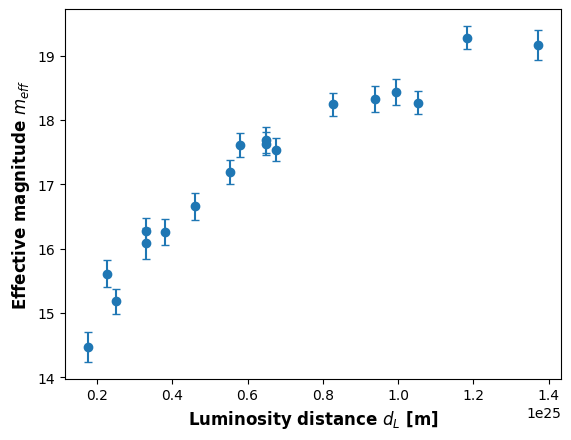

In [4]:
plt.errorbar(d_L, eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]+1], yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]+1], 
             ls='none', marker = 'o', capsize = 3)
plt.xlabel('Luminosity distance $d_L$ [m]', weight = 'bold', fontsize = 12)
plt.ylabel('Effective magnitude $m_{eff}$', weight = 'bold', fontsize = 12)

DoF = 17
Optimised parameters =  [3.26596058e+39] 

Covariance matrix = 
 [[1.95259276e+76]]


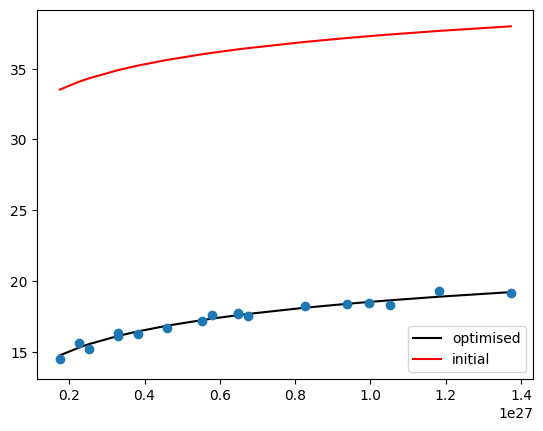

chi^2_min = 21.45553250173656
reduced chi^2 = 1.262090147160974
$P(chi^2_min, DoF)$ = 0.20657423844518508


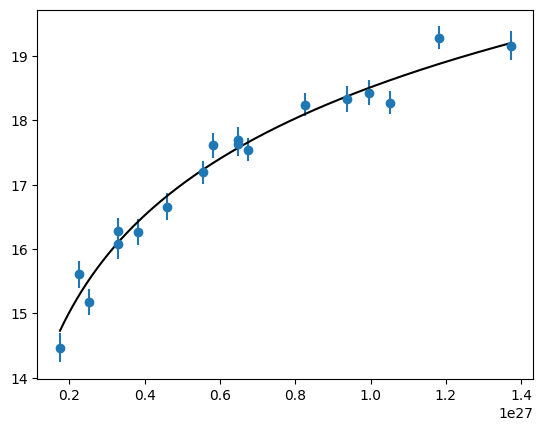

optimised parameter[0] = 3.265960579771694e+39 +/- 1.397352051988444e+38


In [13]:
#chi squared fitting

xval = d_L*100 # cm
yval = eff_peak_mag[low_redshift_indices[0]:low_redshift_indices[-1]+1]
yerr = mag_err[low_redshift_indices[0]:low_redshift_indices[-1]+1]

def model_funct(x, *vals):
    return -2.5*np.log10(vals[0]/(4*np.pi*x**2)) - 20.45

initial = np.array([1.0*10**32]) # Initial guess for fit parameters

parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial) #optimised parameters given in erg/s
L_peak = parameters[0][0]*10**-7
L_peak_err = parameters[1][0]*10**-7

Calculate Ω_Λ,0

In [14]:
omega_lambda = 0.73

high_redshift_indices = np.where(redshift > 0.102)[0]

def mag_model(redshift, L_peak, H_0, m_0, omega_lambda):
    flux_predicted = L_peak/(4*np.pi*(1+redshift)**2*(integrate_array(comoving_distance_integrand, np.zeros(len(redshift)), redshift, args=(H_0, omega_lambda)))**2) #W/m^2/Ang
    flux_predicted = flux_predicted * 10**7 * 10**-4 #erg/s/cm^2/Angstrom
    mag_predicted = m_0 - 2.5*np.log10(flux_predicted) 
    return mag_predicted

def comoving_distance_integrand(z, H_0, omega_lambda):
    return ((3*10**8)/(H_0*((1-(1+z)**3)*omega_lambda + (1+z)**3)**0.5))

def integrate_array(function, lower_limit_array, upper_limit_array, args):
    output = []
    assert len(lower_limit_array) == len(upper_limit_array)
    for i in range(0, len(upper_limit_array)):
        output.append(scipy.integrate.quad(function, lower_limit_array[i], upper_limit_array[i], args = args)[0])
    return np.array(output)

print(mag_model(redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1], L_peak, H_0, m_0, omega_lambda))
print(eff_peak_mag[high_redshift_indices[0]:high_redshift_indices[-1]+1])
print(redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1])
print((c*integrate_array(comoving_distance_integrand, np.zeros(len(redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1])), redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1], args=(H_0, omega_lambda))/(3.086*10**22)))

[22.86618688 22.20125349 22.67170972 22.34195431 22.64103766 22.32819859
 22.36926466 22.83756811 22.9057724  23.08527133 23.81121297 22.51489414
 23.6431789  22.98877704 22.82025663 22.43639826 23.44138883 23.04279059
 23.06941566 23.81528847 24.44084077 22.82025663 22.70205154 23.48749005
 24.22049058 23.22912742 20.41259947 23.66043873 23.54183894 23.3468728
 20.52218307 22.34195431 22.94481126 22.70205154 23.8193581  23.63016459
 21.94444288 23.48291355 22.82025663 23.49205917 22.61625725 24.44735302]
[23.11 22.38 22.13 21.72 22.55 22.26 22.58 23.17 23.33 23.71 23.27 22.36
 23.19 22.96 22.51 22.65 23.27 23.1  22.83 23.57 24.65 23.17 23.13 23.46
 24.47 23.15 20.17 23.8  24.42 23.51 20.43 23.52 23.11 22.57 23.83 23.69
 21.86 23.48 22.83 23.09 22.57 24.32]
[0.458 0.354 0.425 0.374 0.42  0.372 0.378 0.453 0.465 0.498 0.655 0.4
 0.615 0.48  0.45  0.388 0.57  0.49  0.495 0.656 0.828 0.45  0.43  0.58
 0.763 0.526 0.172 0.619 0.592 0.55  0.18  0.374 0.472 0.43  0.657 0.612
 0.32  0.579 0.4

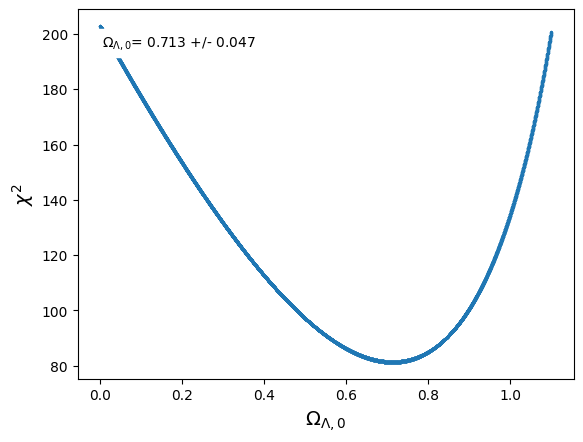

In [15]:
#Now for an array of values of omega_lambda

def find_omega_lambda_and_error():
    no_of_values = 10000
    omega_lambdas = np.linspace(0, 1.1, no_of_values)
    actual = eff_peak_mag[high_redshift_indices[0]:high_redshift_indices[-1]+1]
    error = mag_err[high_redshift_indices[0]:high_redshift_indices[-1]+1]
    chi_squared = []
    for omega_lambda in omega_lambdas:
        predicted = mag_model(redshift[high_redshift_indices[0]:high_redshift_indices[-1]+1], L_peak, H_0, m_0, omega_lambda)
        chi_squared.append(np.sum((actual-predicted)**2/error**2))

    min_index = np.argmin(chi_squared)
    omega_lambda = np.round(omega_lambdas[min_index], 3)
    min_chisq = chi_squared[min_index]
    counter = 0
    errors = []
    try:
        while True:
            if chi_squared[min_index+counter]-min_chisq > 1:
                errors.append(omega_lambdas[min_index+counter]-omega_lambda)
                break
            else:
                counter += 1
    except:
        print('Error calculation exceeds maximum trial value!')

    counter = 0
    try:
        while True:
            if chi_squared[min_index-counter]-min_chisq > 1:
                errors.append(omega_lambdas[min_index-counter]-omega_lambda)
                break
            else:
                counter += 1
    except:
        print('Error calculation exceeds minimum trial value!')

    omega_lambda_err = np.round(np.max(errors), 3)

    plt.scatter(omega_lambdas, chi_squared, marker = 'x', s = 2)
    plt.xlabel('$Ω_{Λ,0}$', fontsize = 14)
    plt.ylabel('$χ^2$', fontsize = 14)
    plt.annotate('$Ω_{Λ,0}$' + f'= {omega_lambda} +/- {omega_lambda_err}', xycoords = 'axes fraction', xy = (0.05, 0.9), backgroundcolor = 'white')
    plt.show()

    return omega_lambda, omega_lambda_err

values = find_omega_lambda_and_error()
omega_lambda = values[0]; omega_lambda_err = values[1]


In [16]:
print(comoving_distance)
#print(c*integrate_array(comoving_distance_integrand, np.zeros(len(redshift)), redshift, args=(H_0, omega_lambda)))
print(c*integrate_array(comoving_distance_integrand, np.zeros(len(redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1])), redshift[low_redshift_indices[0]:low_redshift_indices[-1]+1], args=(H_0, omega_lambda)))

[3.703200e+24 6.172000e+24 3.209440e+24 9.258000e+24 3.209440e+24
 1.728160e+24 1.246744e+25 2.468800e+24 4.443840e+24 5.554800e+24
 5.307920e+24 2.221920e+24 9.751760e+24 1.086272e+25 7.776720e+24
 8.764240e+24 6.418880e+24 6.172000e+24]
[1.10373675e+33 1.83144919e+33 9.57411326e+32 2.73183069e+33
 9.57411326e+32 5.16880567e+32 3.65718447e+33 7.37436801e+32
 1.32273689e+33 1.65013500e+33 1.57749445e+33 6.63982580e+32
 2.87492895e+33 3.19592314e+33 2.30093897e+33 2.58846594e+33
 1.90385979e+33 1.83144919e+33]
